In [119]:

!kaggle competitions download -c spaceship-titanic

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [120]:
import pandas as pd
import numpy as np

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")



Combinamos ambos Datasets

In [121]:
def combine_df(train_df, test_df):
    combine_df = pd.concat([train_df,test_df], ignore_index=True)
    return combine_df

def separate_df(combined_df, train_df_len, test_df_len):
    train_df = combined_df.iloc[:train_df_len]
    test_df = combined_df.iloc[train_df_len:train_df_len+test_df_len]
    return train_df, test_df

full_df = combine_df(train_df, test_df)
len(full_df)

12970

In [122]:
full_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Limpieza de datos

1-Distinguir volumnas categoricas de numericas
2-Tipos de datos
3-Valores nulos

In [123]:
full_df['Transported']= full_df['Transported'].astype(bool)
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   12970 non-null  bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 1.3+ MB


In [124]:
print("Variables categoricas:")
variables_categoricas = full_df.select_dtypes(include =['object']).columns
for col in  variables_categoricas:
  print(col)

Variables categoricas:
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [125]:
print("Variables numericas:")
variables_numericas = full_df._get_numeric_data().columns
for col in variables_numericas:
  print(col)

Variables numericas:
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [126]:
full_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [127]:
# valores nulos
full_df.isna().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
Transported       0
dtype: int64

Remplazamos valores nulos

1-Variables categoricas son remplazadas con la moda

2-Variables numericas son remplazadasd con el promedio

In [128]:
# Variables categoricas

for cat_col in variables_categoricas:
  full_df[cat_col] = full_df[cat_col].fillna(full_df[cat_col].mode()[0])

In [129]:
# variables numericas

for num_col in variables_numericas:
  full_df[num_col] = full_df[num_col].fillna(full_df[num_col].mean())

In [130]:
# Se han eliminado valores nulos
full_df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

<Axes: xlabel='Transported', ylabel='count'>

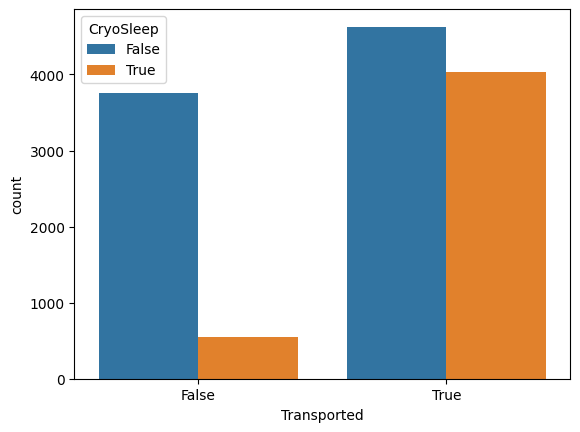

In [131]:
# Se aprecia relacion entre estado de Criogenesis y posibilidad de ser transportado
import seaborn as sb
sb.countplot(x="Transported", data= full_df, hue="CryoSleep")

In [132]:
# se separan los datos de columna 'Cabin'

cabin_split = full_df['Cabin'].str.split('/', expand=True)
cabin_split.columns = ["Deck", "Room_Number", "Side"]
new_df = pd.concat([full_df, cabin_split], axis=1)
new_df = new_df.drop(['Cabin'], axis=1)
new_df.head()



,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Room_Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [133]:
new_df = new_df.drop(['PassengerId', 'Destination', 'Name'], axis=1)
new_df.head()

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Room_Number,Side
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [134]:
home_dummies = pd.get_dummies(new_df['HomePlanet'])

In [135]:
new_df = pd.concat([new_df,home_dummies], axis=1)


In [136]:
deck_dummies = pd.get_dummies(new_df['Deck'])
side_dummies = pd.get_dummies(new_df['Side'])

final_df = new_df.drop(['Deck','Side'], axis=1)

final_df = pd.concat([final_df,deck_dummies,side_dummies], axis=1)

final_df.head()


,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,A,B,C,D,E,F,G,T,P,S
0,Europa,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,...,False,True,False,False,False,False,False,False,True,False
1,Earth,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,...,False,False,False,False,False,True,False,False,False,True
2,Europa,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,...,True,False,False,False,False,False,False,False,False,True
3,Europa,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,...,True,False,False,False,False,False,False,False,False,True
4,Earth,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,...,False,False,False,False,False,True,False,False,False,True


In [137]:
final_df = final_df.rename(columns={"A": "Deck_A", "B": "Deck_B", "C":"Deck_C", "D":"Deck_D","E":"Deck_E","F":"Deck_F","G":"Deck_G","T":"Deck_T","P":"Side_P","S":"Side_S"})

In [138]:
 final_df.drop(['Side_S'], axis=1, inplace=True)

In [139]:
final_df.drop(['HomePlanet'], axis=1, inplace = True)

<Axes: >

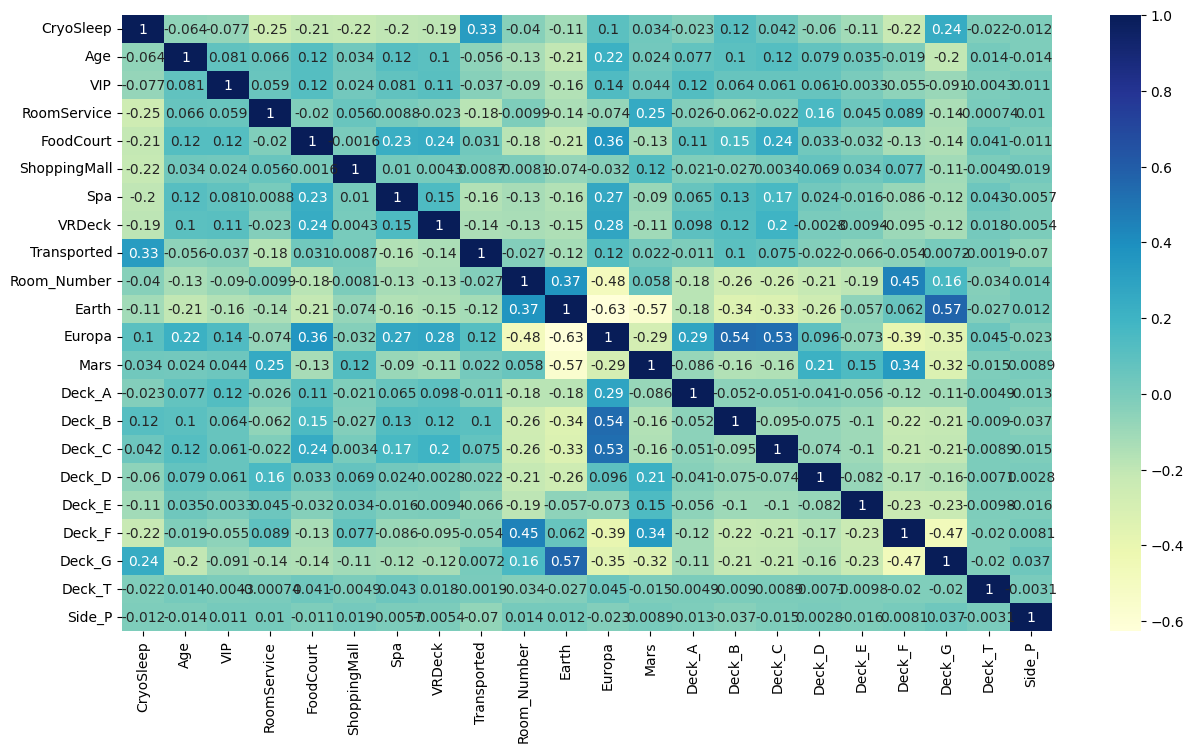

In [140]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
sb.heatmap(final_df.corr(), annot=True, cmap="YlGnBu")

In [141]:
final_df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Room_Number,...,Mars,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,...,False,False,True,False,False,False,False,False,False,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0,...,False,False,False,False,False,False,True,False,False,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0,...,False,True,False,False,False,False,False,False,False,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0,...,False,True,False,False,False,False,False,False,False,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,...,False,False,False,False,False,False,True,False,False,False


In [142]:
# Se han elegido las variables cuyo valor no se acerque a cero en relacion a Transported

final_df_2= final_df[["CryoSleep","RoomService","Spa", "VRDeck","Earth","Europa","Mars","Transported"]]
final_df_2

,CryoSleep,RoomService,Spa,VRDeck,Earth,Europa,Mars,Transported
0,False,0.0,0.0,0.0,False,True,False,False
1,False,109.0,549.0,44.0,True,False,False,True
2,False,43.0,6715.0,49.0,False,True,False,False
3,False,0.0,3329.0,193.0,False,True,False,False
4,False,303.0,565.0,2.0,True,False,False,True
...,...,...,...,...,...,...,...,...
12965,True,0.0,0.0,0.0,True,False,False,True
12966,False,0.0,10.0,144.0,True,False,False,True
12967,True,0.0,0.0,0.0,False,False,True,True
12968,False,0.0,0.0,523.0,False,True,False,True


In [143]:
# Separamos sets  X e Y

train_df, test_df = separate_df(final_df, train_df.shape[0], test_df.shape[0])

# especificamos y
y= train_df['Transported']
# y2 = test_df['Transported']

# Especificamos X
X = train_df.drop(['Transported'], axis=1)
# X2 = test_df.drop(['Transported'], axis=1)




In [160]:
X

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Room_Number,Earth,...,Mars,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,0,False,...,False,False,True,False,False,False,False,False,False,True
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,0,True,...,False,False,False,False,False,False,True,False,False,False
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,False,...,False,True,False,False,False,False,False,False,False,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,False,...,False,True,False,False,False,False,False,False,False,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,1,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,98,False,...,False,True,False,False,False,False,False,False,False,True
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,1499,True,...,False,False,False,False,False,False,False,True,False,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,1500,True,...,False,False,False,False,False,False,False,True,False,False
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,608,False,...,False,False,False,False,False,True,False,False,False,False


In [163]:
# Usamos set con variables reducidas
train_df2, test_df2 = separate_df(final_df_2, train_df.shape[0], test_df.shape[0])

# especificamos y
y2= train_df2['Transported']
# y2 = test_df['Transported']

# Especificamos X
X2 = train_df2.drop(['Transported'], axis=1)
# X2 = test_df.drop(['Transported'], axis=1)

In [164]:
X2

,CryoSleep,RoomService,Spa,VRDeck,Earth,Europa,Mars
0,False,0.0,0.0,0.0,False,True,False
1,False,109.0,549.0,44.0,True,False,False
2,False,43.0,6715.0,49.0,False,True,False
3,False,0.0,3329.0,193.0,False,True,False
4,False,303.0,565.0,2.0,True,False,False
...,...,...,...,...,...,...,...
8688,False,0.0,1643.0,74.0,False,True,False
8689,True,0.0,0.0,0.0,True,False,False
8690,False,0.0,1.0,0.0,True,False,False
8691,False,0.0,353.0,3235.0,False,True,False


In [165]:
# Dividimos datos en entrenamiento y prueba 
# Usamos 20% de los datos para pruebas
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=.2)

In [166]:
X_train.isna().sum()

CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Room_Number     0
Earth           0
Europa          0
Mars            0
Deck_A          0
Deck_B          0
Deck_C          0
Deck_D          0
Deck_E          0
Deck_F          0
Deck_G          0
Deck_T          0
Side_P          0
dtype: int64

In [167]:
# Escalamos datos X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_esc = scaler.fit_transform(X_train)
X_test_esc = scaler.fit_transform(X_test)

# Escalamos con variables reducidas
X_train_esc2 = scaler.fit_transform(X_train2)
X_test_esc2 = scaler.fit_transform(X_test2)

In [176]:
# Entrenamos el modelo de regresion logistica
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model2 = LogisticRegression()

model.fit(X_train_esc, y_train)
model2.fit(X_train_esc2, y_train2)


LogisticRegression()

In [177]:
predictions = model.predict(X_test_esc)
predictions2 = model2.predict(X_test_esc2)

In [190]:
# Medimos exactitud del modelo
from sklearn.metrics import accuracy_score

accuracy_modelo1 = accuracy_score(y_test, predictions)
accuracy_modelo2 = accuracy_score(y_test2, predictions2)

print(f"{accuracy_modelo1} \n{accuracy_modelo2}")


0.7935595169637722 
0.7538815411155837


Tenemos un 79% de precision en nuestra prediccion en modelo1
Tenemos un 75% de precision en nuestra prediccion en modelo2

In [208]:
# Prediccion en set de testeo
zy1 = test_df['Transported']
zX1 = test_df.drop(['Transported'], axis=1)

# /////
zy2 = test_df2['Transported']
zX2 = test_df2.drop(['Transported'], axis=1)



In [209]:
# escalamos X de testeo
X_test_scaled = scaler.fit_transform(zX1)
X_test_scaled2 = scaler.fit_transform(zX2)






In [214]:
pred_test1 = model.predict(X_test_scaled)
pred_test2 = model2.predict(X_test_scaled2)

accuracy_test_1=accuracy_score(zy1,pred_test1)
accuracy_test_2=accuracy_score(zy2,pred_test2)

print(f"Predicciones coin todas las variables:{accuracy_test_1*100} % \n Prediccion con variables reducidas {accuracy_test_2*100} %")

Predicciones coin todas las variables:53.16810848725743 % 
 Prediccion con variables reducidas 44.82113631049801 %


In [153]:
# generamos predicciones con X de testeo escalado
predicciones2= model.predict(X2_esc)
accuracy_score(y2,predicciones2)
# print(predicciones2)

0.7942022316806626

In [154]:
# vemos mas metricas
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.80      0.77      0.79       875
        True       0.78      0.81      0.79       864

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [215]:
# veamos una matriz de confusion para ver cuantas veces acertamos con modelo de variables totales
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, predictions), columns= ["Pred: No", "Pred: Si"], index= ["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,661,208
Real: Si,151,719


In [157]:
# se guarda modelo de variables totales
import pickle

In [158]:
pickle.dump(model, open('./model_saved','wb'))